#1.Data Loading and Exploration

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Display the first few rows of the dataframe
print(df.head())

# Summary statistics
print(df.describe())

# Check for missing values
print(df.isnull().sum())


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

#2.Data Preprocessing

In [3]:
# Drop customerID column
df.drop(columns=['customerID'], inplace=True)

# Convert TotalCharges to numeric, coerce errors and fill missing values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

# Encode categorical variables
df = pd.get_dummies(df, drop_first=True)

# Define features and target
X = df.drop(columns=['Churn_Yes'])
y = df['Churn_Yes']

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#3.Feature Selection

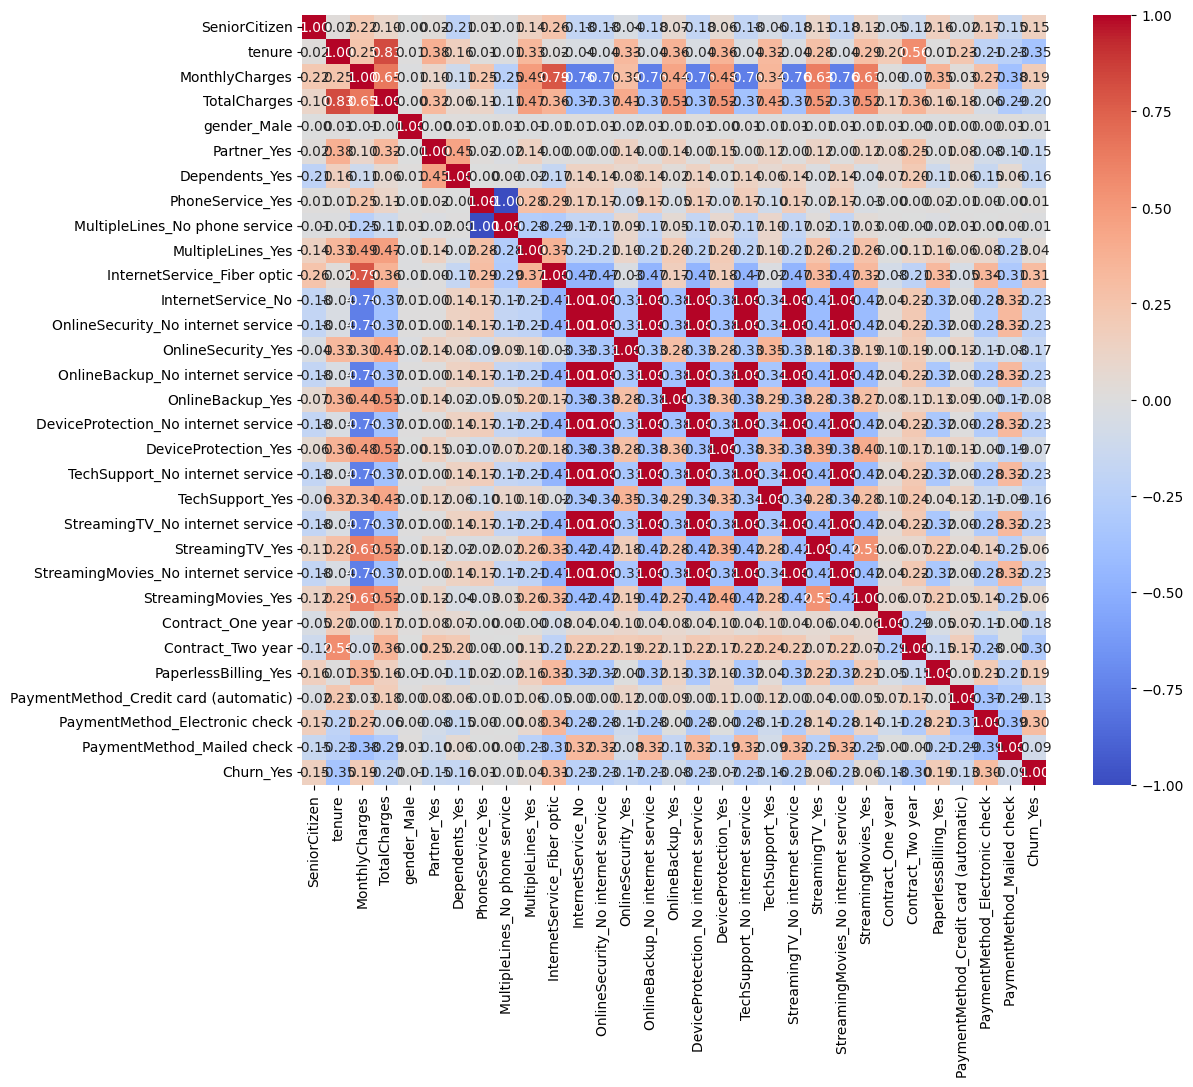

Selected features based on correlation threshold:
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Partner_Yes', 'Dependents_Yes', 'InternetService_Fiber optic', 'InternetService_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes', 'OnlineBackup_No internet service', 'DeviceProtection_No internet service', 'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No internet service', 'StreamingMovies_No internet service', 'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check']


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

# Select highly correlated features with the target
threshold = 0.1
corr_target = abs(corr["Churn_Yes"])
relevant_features = corr_target[corr_target > threshold]
selected_features = relevant_features.index.drop('Churn_Yes').tolist()

print("Selected features based on correlation threshold:")
print(selected_features)

# Update X to include only selected features
X = df[selected_features]


#4. Model Building and Evaluation

Logistic Regression:
Accuracy: 0.8183
Precision: 0.6834
Recall: 0.5845
F1 Score: 0.6301
ROC AUC: 0.7435

Decision Tree:
Accuracy: 0.7140
Precision: 0.4588
Recall: 0.4477
F1 Score: 0.4532
ROC AUC: 0.6288

Random Forest:
Accuracy: 0.7984
Precision: 0.6679
Recall: 0.4745
F1 Score: 0.5549
ROC AUC: 0.6948

Gradient Boosting:
Accuracy: 0.8091
Precision: 0.6722
Recall: 0.5442
F1 Score: 0.6015
ROC AUC: 0.7243



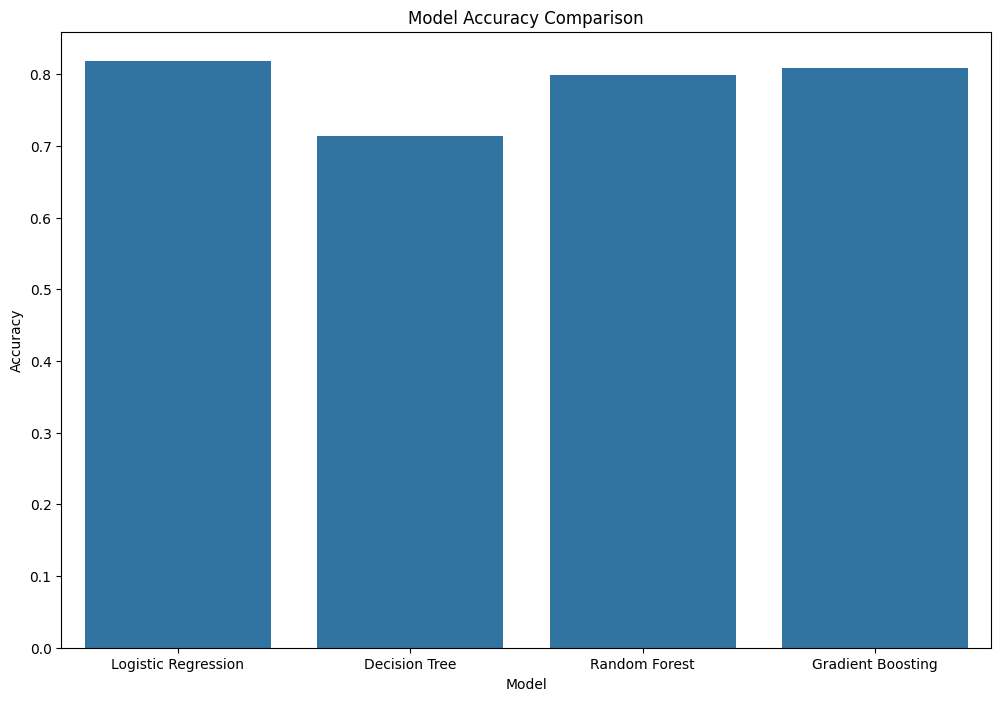

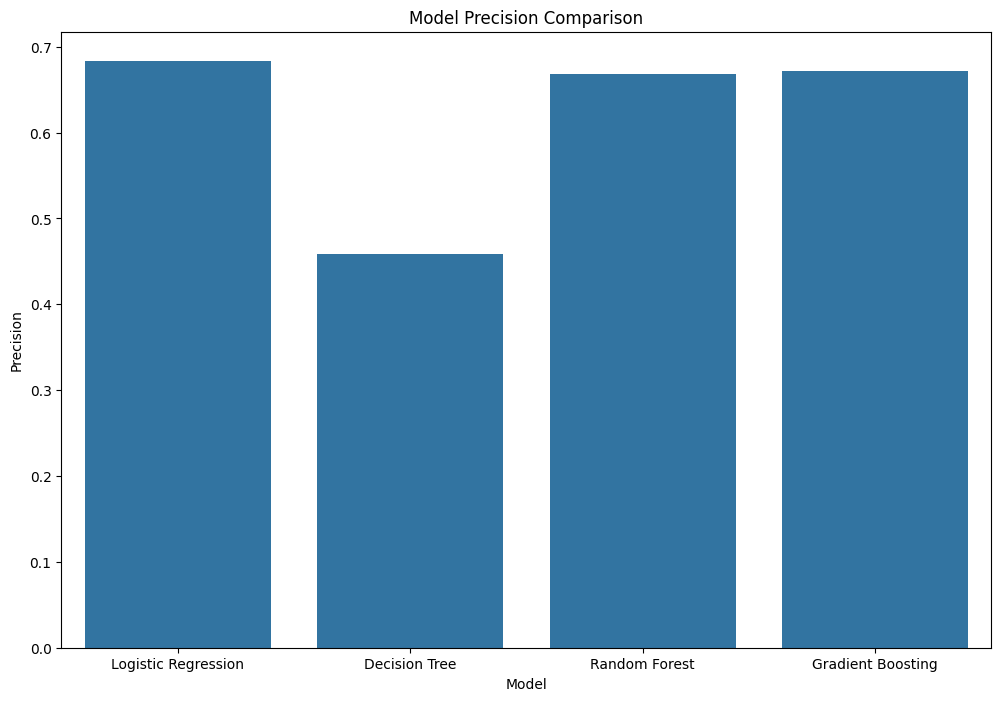

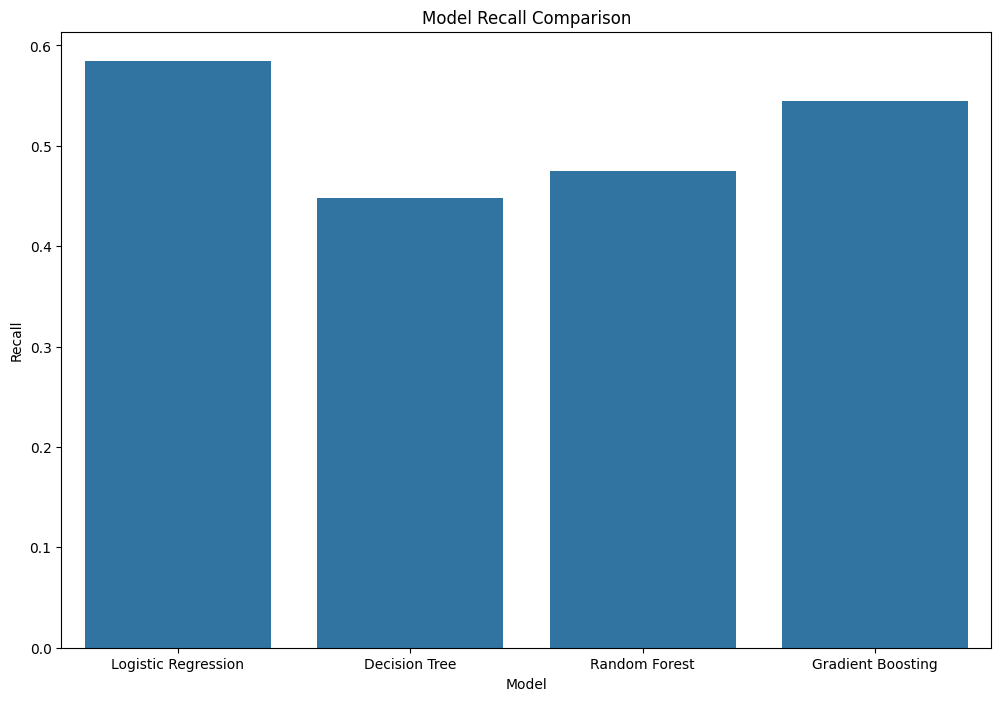

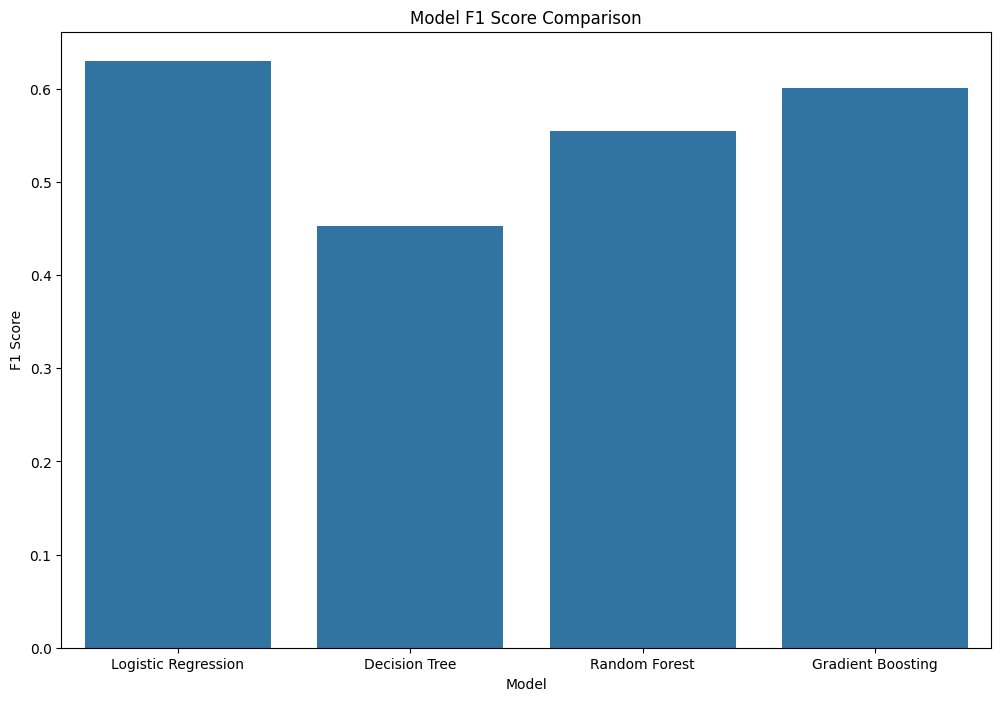

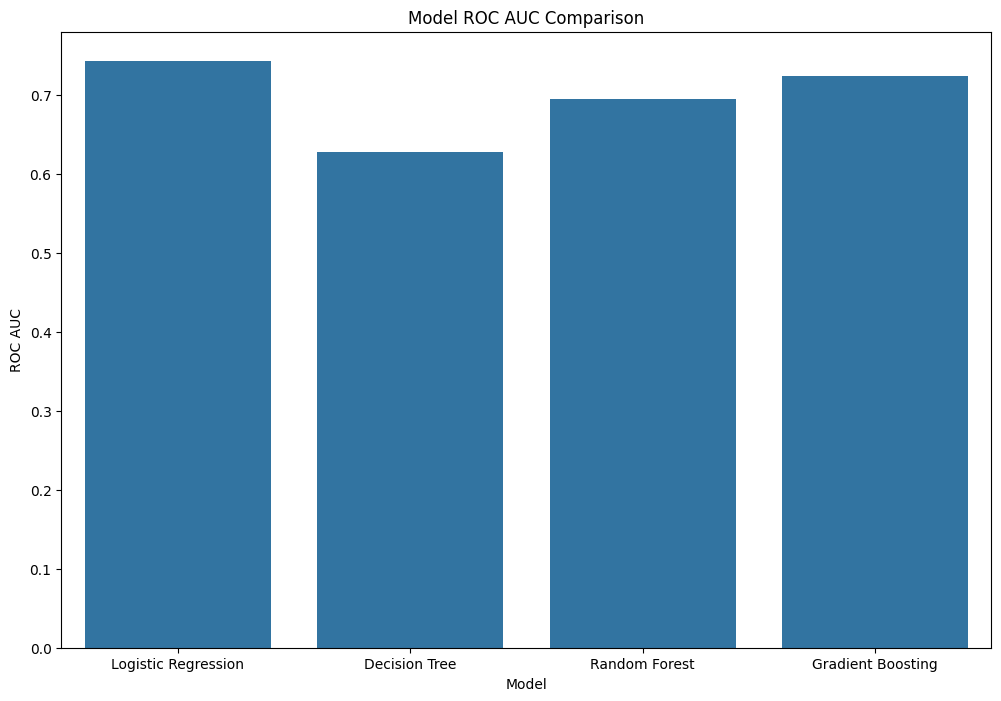

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

# Lists to store results
model_names = []
accuracies = []
precisions = []
recalls = []
f1_scores = []
roc_aucs = []

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    model_names.append(name)
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))
    roc_aucs.append(roc_auc_score(y_test, y_pred))

    print(f'{name}:')
    print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
    print(f'Precision: {precision_score(y_test, y_pred):.4f}')
    print(f'Recall: {recall_score(y_test, y_pred):.4f}')
    print(f'F1 Score: {f1_score(y_test, y_pred):.4f}')
    print(f'ROC AUC: {roc_auc_score(y_test, y_pred):.4f}\n')

# Create a dataframe for results
results = pd.DataFrame({
    'Model': model_names,
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores,
    'ROC AUC': roc_aucs
})

# Plot the results
plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='Accuracy', data=results)
plt.title('Model Accuracy Comparison')
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='Precision', data=results)
plt.title('Model Precision Comparison')
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='Recall', data=results)
plt.title('Model Recall Comparison')
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='F1 Score', data=results)
plt.title('Model F1 Score Comparison')
plt.show()

plt.figure(figsize=(12, 8))
sns.barplot(x='Model', y='ROC AUC', data=results)
plt.title('Model ROC AUC Comparison')
plt.show()


#Select the best the model

In [6]:
# Select the best model based on a chosen metric, e.g., Accuracy
best_model_index = results['Accuracy'].idxmax()
best_model_name = results.loc[best_model_index, 'Model']
best_model = models[best_model_name]

print(f'The best model is {best_model_name}')

# Use the best model for final prediction
new_data = X_test.iloc[:5]  # Example with first 5 rows of X_test
new_predictions = best_model.predict(new_data)
print(f'Predictions by the best model ({best_model_name}): {new_predictions}')

The best model is Logistic Regression
Predictions by the best model (Logistic Regression): [ True False False  True False]


In [7]:
# Retrain the best model on the entire dataset
best_model.fit(X, y)

# Predict churn probabilities for all customers
churn_probabilities = best_model.predict_proba(X)[:, 1]

# Add probabilities to the original dataframe
df['Churn_Probability'] = churn_probabilities

# Identify customers with high churn probability (e.g., probability > 0.5)
high_churn_customers = df[df['Churn_Probability'] > 0.5]

# Display high churn customers
print("Customers most likely to leave the company:")
print(high_churn_customers[['TotalCharges', 'tenure', 'MonthlyCharges', 'Churn_Probability']])

Customers most likely to leave the company:
      TotalCharges  tenure  MonthlyCharges  Churn_Probability
0            29.85       1           29.85           0.639768
4           151.65       2           70.70           0.756856
5           820.50       8           99.65           0.734955
19         1862.90      21           90.05           0.630751
20           39.65       1           39.65           0.720926
...            ...     ...             ...                ...
7018         70.65       1           70.65           0.594993
7029        263.05       6           44.40           0.669838
7032         75.75       1           75.75           0.818171
7035       1495.10      19           78.70           0.508438
7041        306.60       4           74.40           0.704654

[1539 rows x 4 columns]


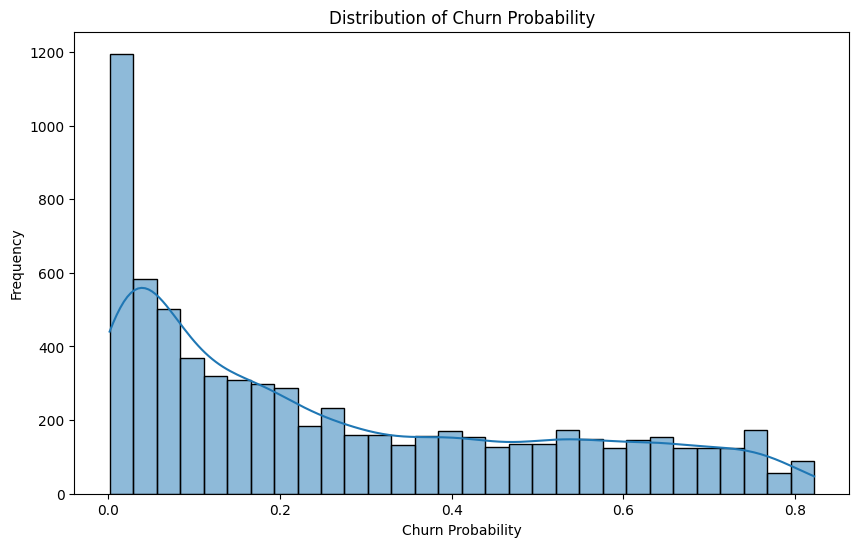

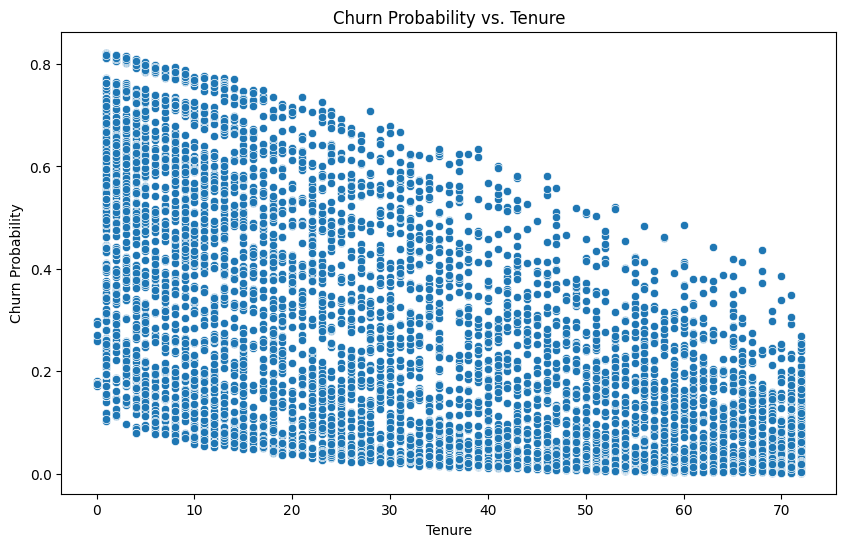

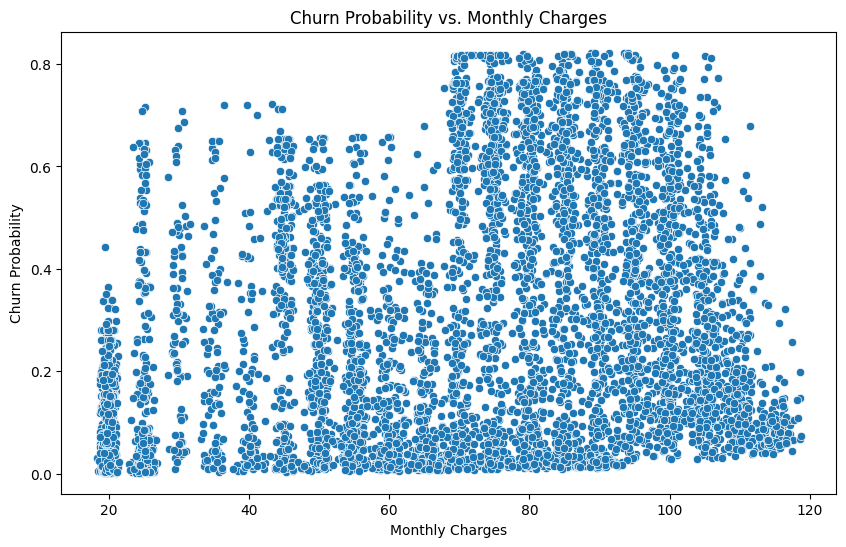

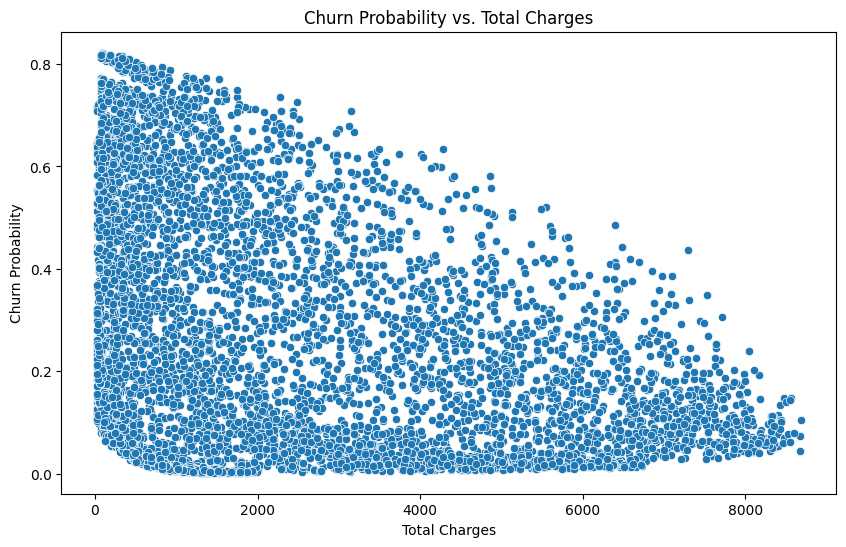

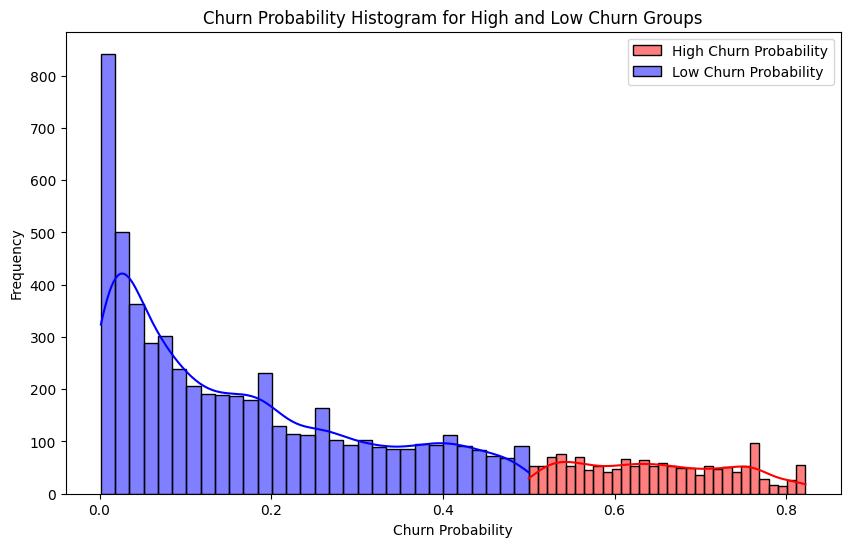

In [8]:
# 1. Distribution of Churn Probability
plt.figure(figsize=(10, 6))
sns.histplot(df['Churn_Probability'], kde=True, bins=30)
plt.title('Distribution of Churn Probability')
plt.xlabel('Churn Probability')
plt.ylabel('Frequency')
plt.show()

# 2. Churn Probability vs. Tenure
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['tenure'], y=df['Churn_Probability'])
plt.title('Churn Probability vs. Tenure')
plt.xlabel('Tenure')
plt.ylabel('Churn Probability')
plt.show()

# 3. Churn Probability vs. Monthly Charges
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['MonthlyCharges'], y=df['Churn_Probability'])
plt.title('Churn Probability vs. Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Churn Probability')
plt.show()

# 4. Churn Probability vs. Total Charges
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['TotalCharges'], y=df['Churn_Probability'])
plt.title('Churn Probability vs. Total Charges')
plt.xlabel('Total Charges')
plt.ylabel('Churn Probability')
plt.show()

# 5. Churn Probability Histogram for High and Low Churn Groups
plt.figure(figsize=(10, 6))
high_churn = df[df['Churn_Probability'] > 0.5]
low_churn = df[df['Churn_Probability'] <= 0.5]
sns.histplot(high_churn['Churn_Probability'], color='red', label='High Churn Probability', kde=True, bins=30)
sns.histplot(low_churn['Churn_Probability'], color='blue', label='Low Churn Probability', kde=True, bins=30)
plt.title('Churn Probability Histogram for High and Low Churn Groups')
plt.xlabel('Churn Probability')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [9]:
# Assuming df['Churn_Probability'] contains the predicted churn probabilities
threshold = 0.5

# Segment customers into high and low churn probability groups
high_churn = df[df['Churn_Probability'] > threshold]
low_churn = df[df['Churn_Probability'] <= threshold]

# Optionally, you can sort high_churn by descending churn probability to prioritize high-risk customers
high_churn = high_churn.sort_values(by='Churn_Probability', ascending=False)

# Display or analyze the high_churn group to identify characteristics or patterns
print(f"Number of high churn probability customers: {len(high_churn)}")
print(high_churn.head())  # Display the top customers most likely to churn


Number of high churn probability customers: 1539
      SeniorCitizen  tenure  MonthlyCharges  TotalCharges  gender_Male  \
4800              1       1           94.00         94.00         True   
1976              1       1           93.55         93.55         True   
2191              1       1           91.30         91.30        False   
5783              1       1           89.30         89.30        False   
1600              1       1           88.80         88.80         True   

      Partner_Yes  Dependents_Yes  PhoneService_Yes  \
4800        False           False              True   
1976        False           False              True   
2191        False           False              True   
5783        False           False              True   
1600        False           False              True   

      MultipleLines_No phone service  MultipleLines_Yes  ...  \
4800                           False               True  ...   
1976                           False           

#Histogram of Churn Probability for High and Low Churn Groups

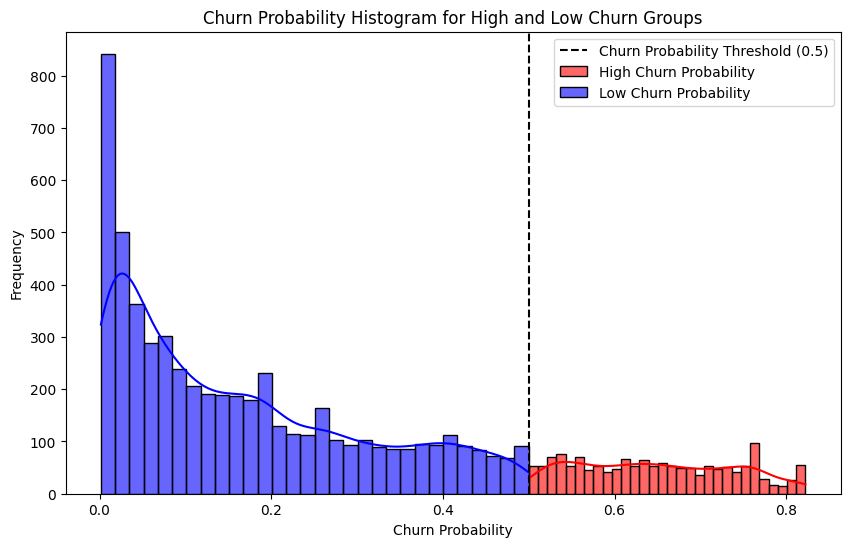

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(high_churn['Churn_Probability'], color='red', label='High Churn Probability', kde=True, bins=30, alpha=0.6)
sns.histplot(low_churn['Churn_Probability'], color='blue', label='Low Churn Probability', kde=True, bins=30, alpha=0.6)
plt.axvline(x=threshold, color='black', linestyle='--', label=f'Churn Probability Threshold ({threshold})')
plt.title('Churn Probability Histogram for High and Low Churn Groups')
plt.xlabel('Churn Probability')
plt.ylabel('Frequency')
plt.legend()
plt.show()
#This histogram compares the churn probability distributions between high and low churn groups, with the threshold marked for reference.
